# Supervised Learning: Classification Project

# Import Libraries/Data

In [692]:
import numpy as np
import pandas as pd
import seaborn as sns
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, recall_score, make_scorer, roc_curve, roc_auc_score, precision_score
import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, recall_score, make_scorer, roc_curve, roc_auc_score

In [693]:
df = pd.read_csv('data_cardiovascular_risk.csv')

# EDA

In [694]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})

In [695]:
df['is_smoking'] = df['is_smoking'].map({'YES': 1, 'NO': 0})

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [300]:
df.describe(include = 'all').round(2)

id      age  education      sex  is_smoking  cigsPerDay   BPMeds  \
count  3390.00  3390.00    3303.00  3390.00      3390.0     3368.00  3346.00   
mean   1694.50    49.54       1.97     0.43         0.5        9.07     0.03   
std     978.75     8.59       1.02     0.50         0.5       11.88     0.17   
min       0.00    32.00       1.00     0.00         0.0        0.00     0.00   
25%     847.25    42.00       1.00     0.00         0.0        0.00     0.00   
50%    1694.50    49.00       2.00     0.00         0.0        0.00     0.00   
75%    2541.75    56.00       3.00     1.00         1.0       20.00     0.00   
max    3389.00    70.00       4.00     1.00         1.0       70.00     1.00   

       prevalentStroke  prevalentHyp  diabetes  totChol    sysBP    diaBP  \
count          3390.00       3390.00   3390.00  3352.00  3390.00  3390.00   
mean              0.01          0.32      0.03   237.07   132.60    82.88   
std               0.08          0.46      0.16    45.25    22.29    12.02   
min               0.00          0.00      0.00   107.00    83.50    48.00   
25%               0.00          0.00      0.00   206.00   117.00    74.50   
50%               0.00          0.00      0.00   234.00   128.50    82.00   
75%               0.00          1.00      0.00   264.00   144.00    90.00   
max               1.00          1.00      1.00   696.00   295.00   142.50   

           BMI  heartRate  glucose  TenYearCHD  
count  3376.00    3389.00  3086.00     3390.00  
mean     25.79      75.98    82.09        0.15  
std       4.12      11.97    24.24        0.36  
min      15.96      45.00    40.00        0.00  
25%      23.02      68.00    71.00        0.00  
50%      25.38      75.00    78.00        0.00  
75%      28.04      83.00    87.00        0.00  
max      56.80     143.00   394.00        1.00

In [301]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

0    2879
1     511
Name: TenYearCHD, dtype: int64


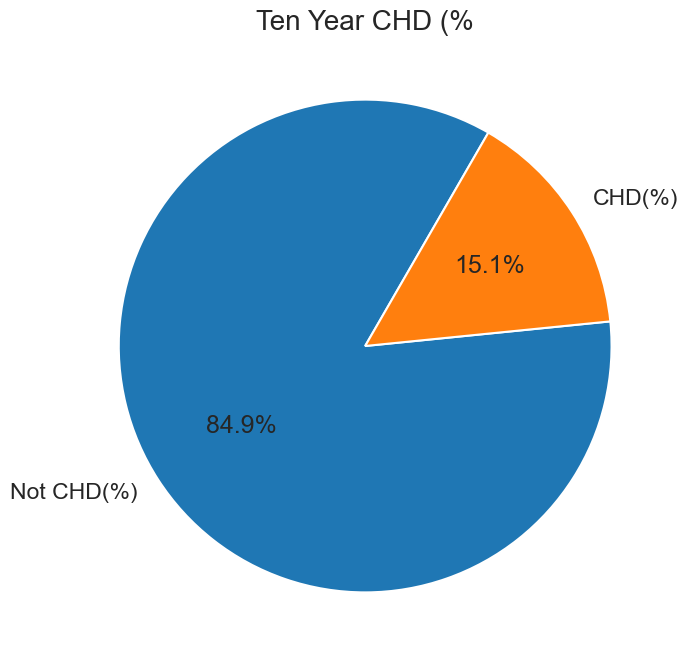

In [302]:
#pie chart
print(df.TenYearCHD.value_counts())
plt.figure(figsize=(10,8)) 
textprops = {'fontsize':13}
plt.pie(df['TenYearCHD'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=60, autopct="%1.1f%%")
plt.title('Ten Year CHD (%', fontsize=20)

plt.show()

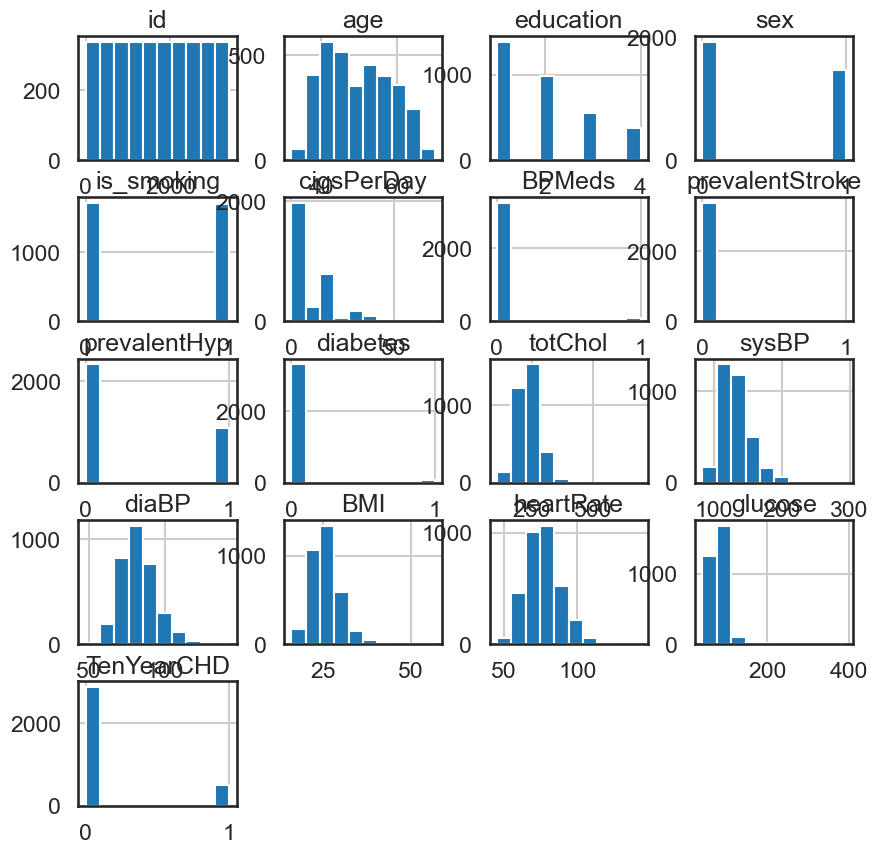

In [303]:
# Histogram to visualize distribution of each column     
df_visual_hist = df.hist(figsize = (10,10))

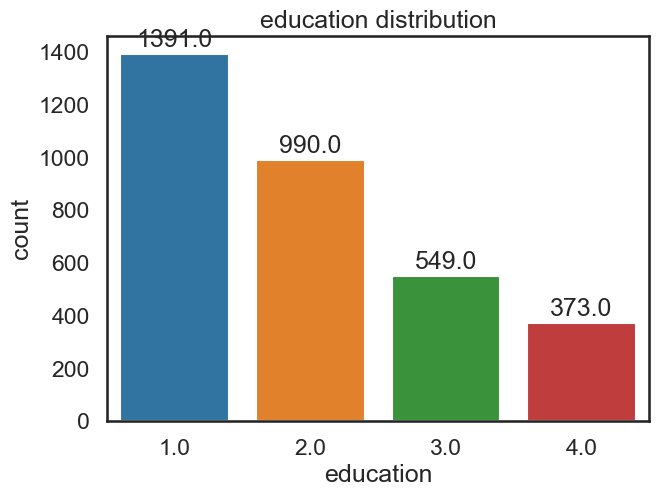

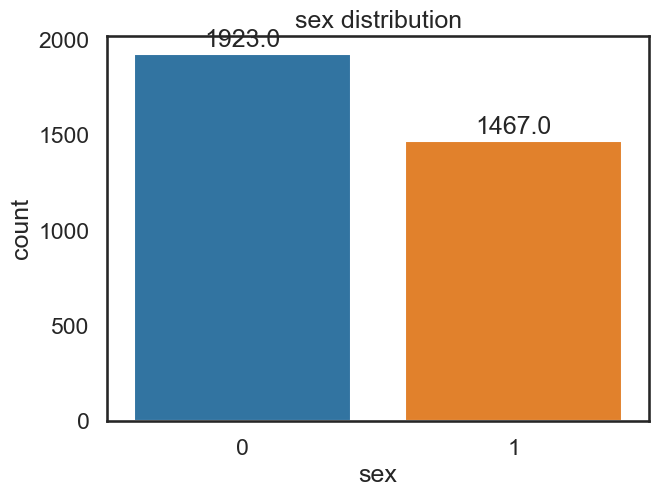

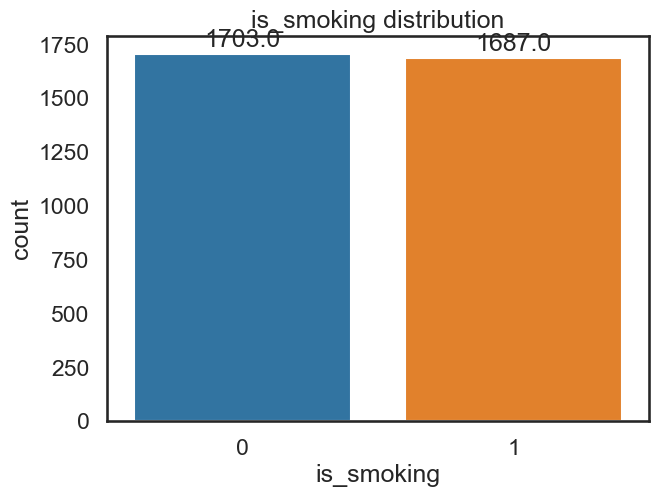

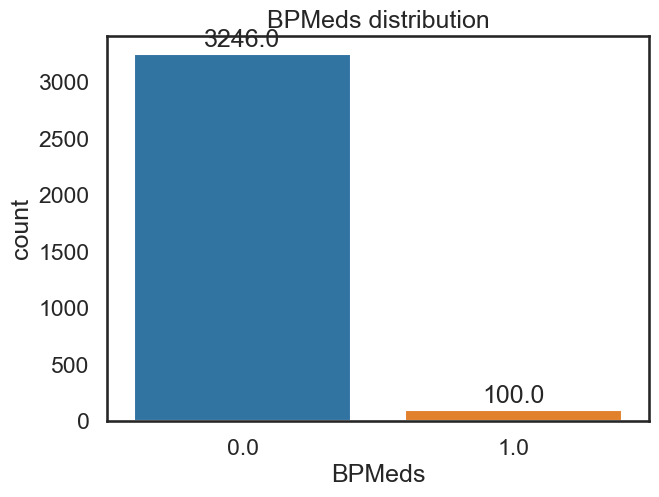

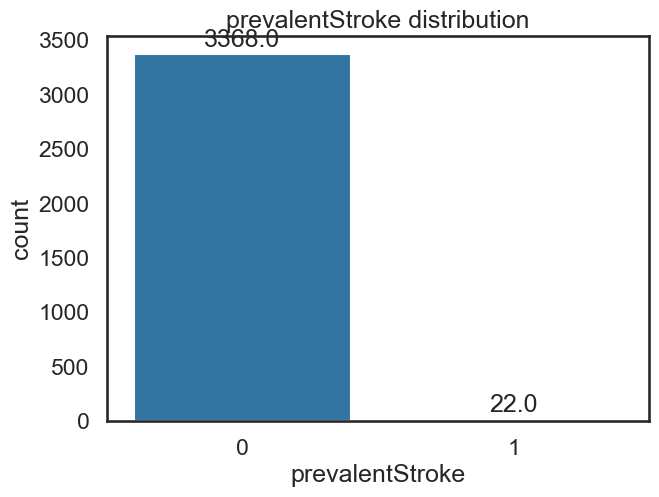

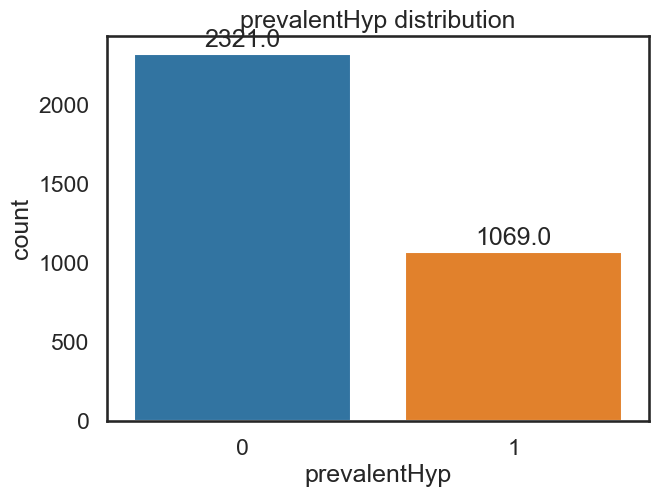

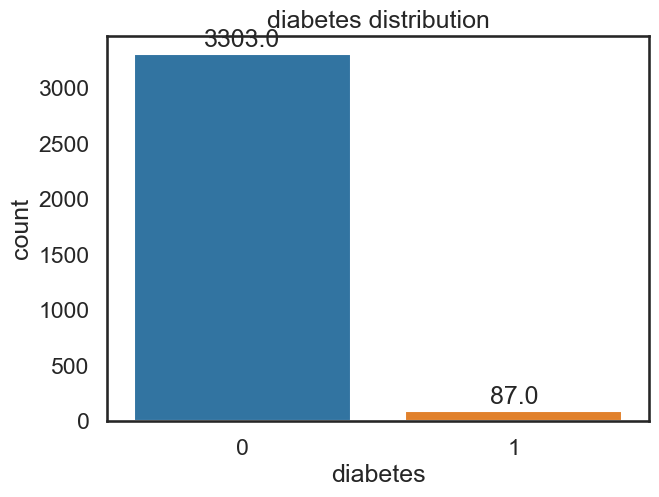

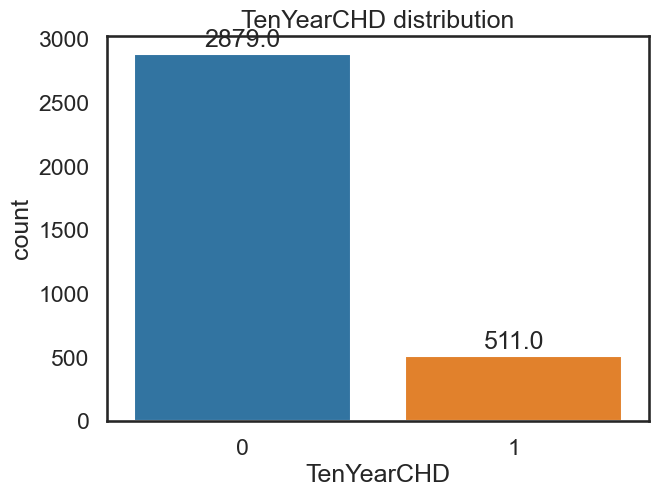

In [304]:
categorical_var = [i for i in df.columns if df[i].nunique()<=4]
for i in categorical_var:
  plt.figure(figsize=(7,5))
  p = sns.countplot(x=i, data = df)
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

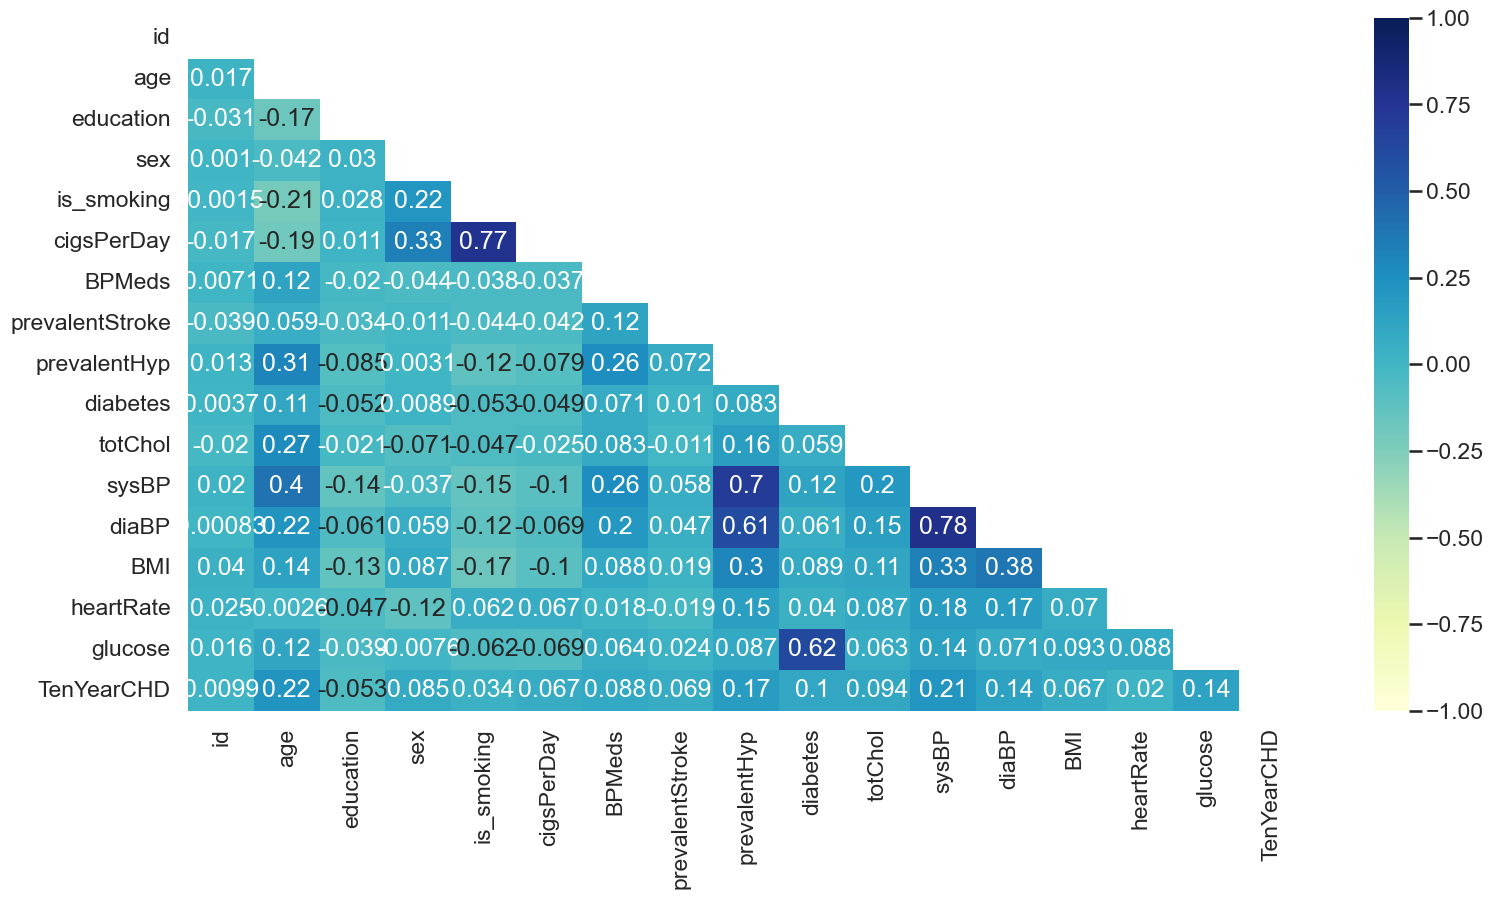

In [305]:
corr = df.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")
    

In [306]:
corr_feature_ranking = corr['TenYearCHD'].sort_values(ascending=False).to_frame()
cm = sns.light_palette('r', as_cmap=True)
style = corr_feature_ranking.style.background_gradient(cmap=cm)
style

# Training/Testing Data Split

In [834]:
X = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2712, 16), (678, 16), (2712,), (678,))

# Support Vector Machine

In [835]:
#remove missing values
newdf = df.fillna(0)
newdf

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0    0           1         3.0     0.0   
1        1   36        4.0    1           0         0.0     0.0   
2        2   46        1.0    0           1        10.0     0.0   
3        3   50        1.0    1           1        20.0     0.0   
4        4   64        1.0    0           1        30.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
3385  3385   60        1.0    0           0         0.0     0.0   
3386  3386   46        1.0    0           0         0.0     0.0   
3387  3387   44        3.0    1           1         3.0     0.0   
3388  3388   60        1.0    1           0         0.0     0.0   
3389  3389   54        3.0    0           0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0   0.00   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [836]:
(newdf['TenYearCHD'] == 1).astype(int)

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int32

In [837]:
# how each column is correlated with CHD
y = (newdf['TenYearCHD'] == 1).astype(int)
fields = list(newdf.columns[:-1])
correlations = newdf[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

education         -0.049565
id                 0.009866
heartRate          0.015686
is_smoking         0.034143
BMI                0.038233
cigsPerDay         0.068020
prevalentStroke    0.068627
totChol            0.077083
sex                0.084647
BPMeds             0.087349
diabetes           0.103681
glucose            0.107161
diaBP              0.135979
prevalentHyp       0.166544
sysBP              0.212703
age                0.224927
dtype: float64

In [584]:
sns.set_context('talk')
sns.set_style('white')

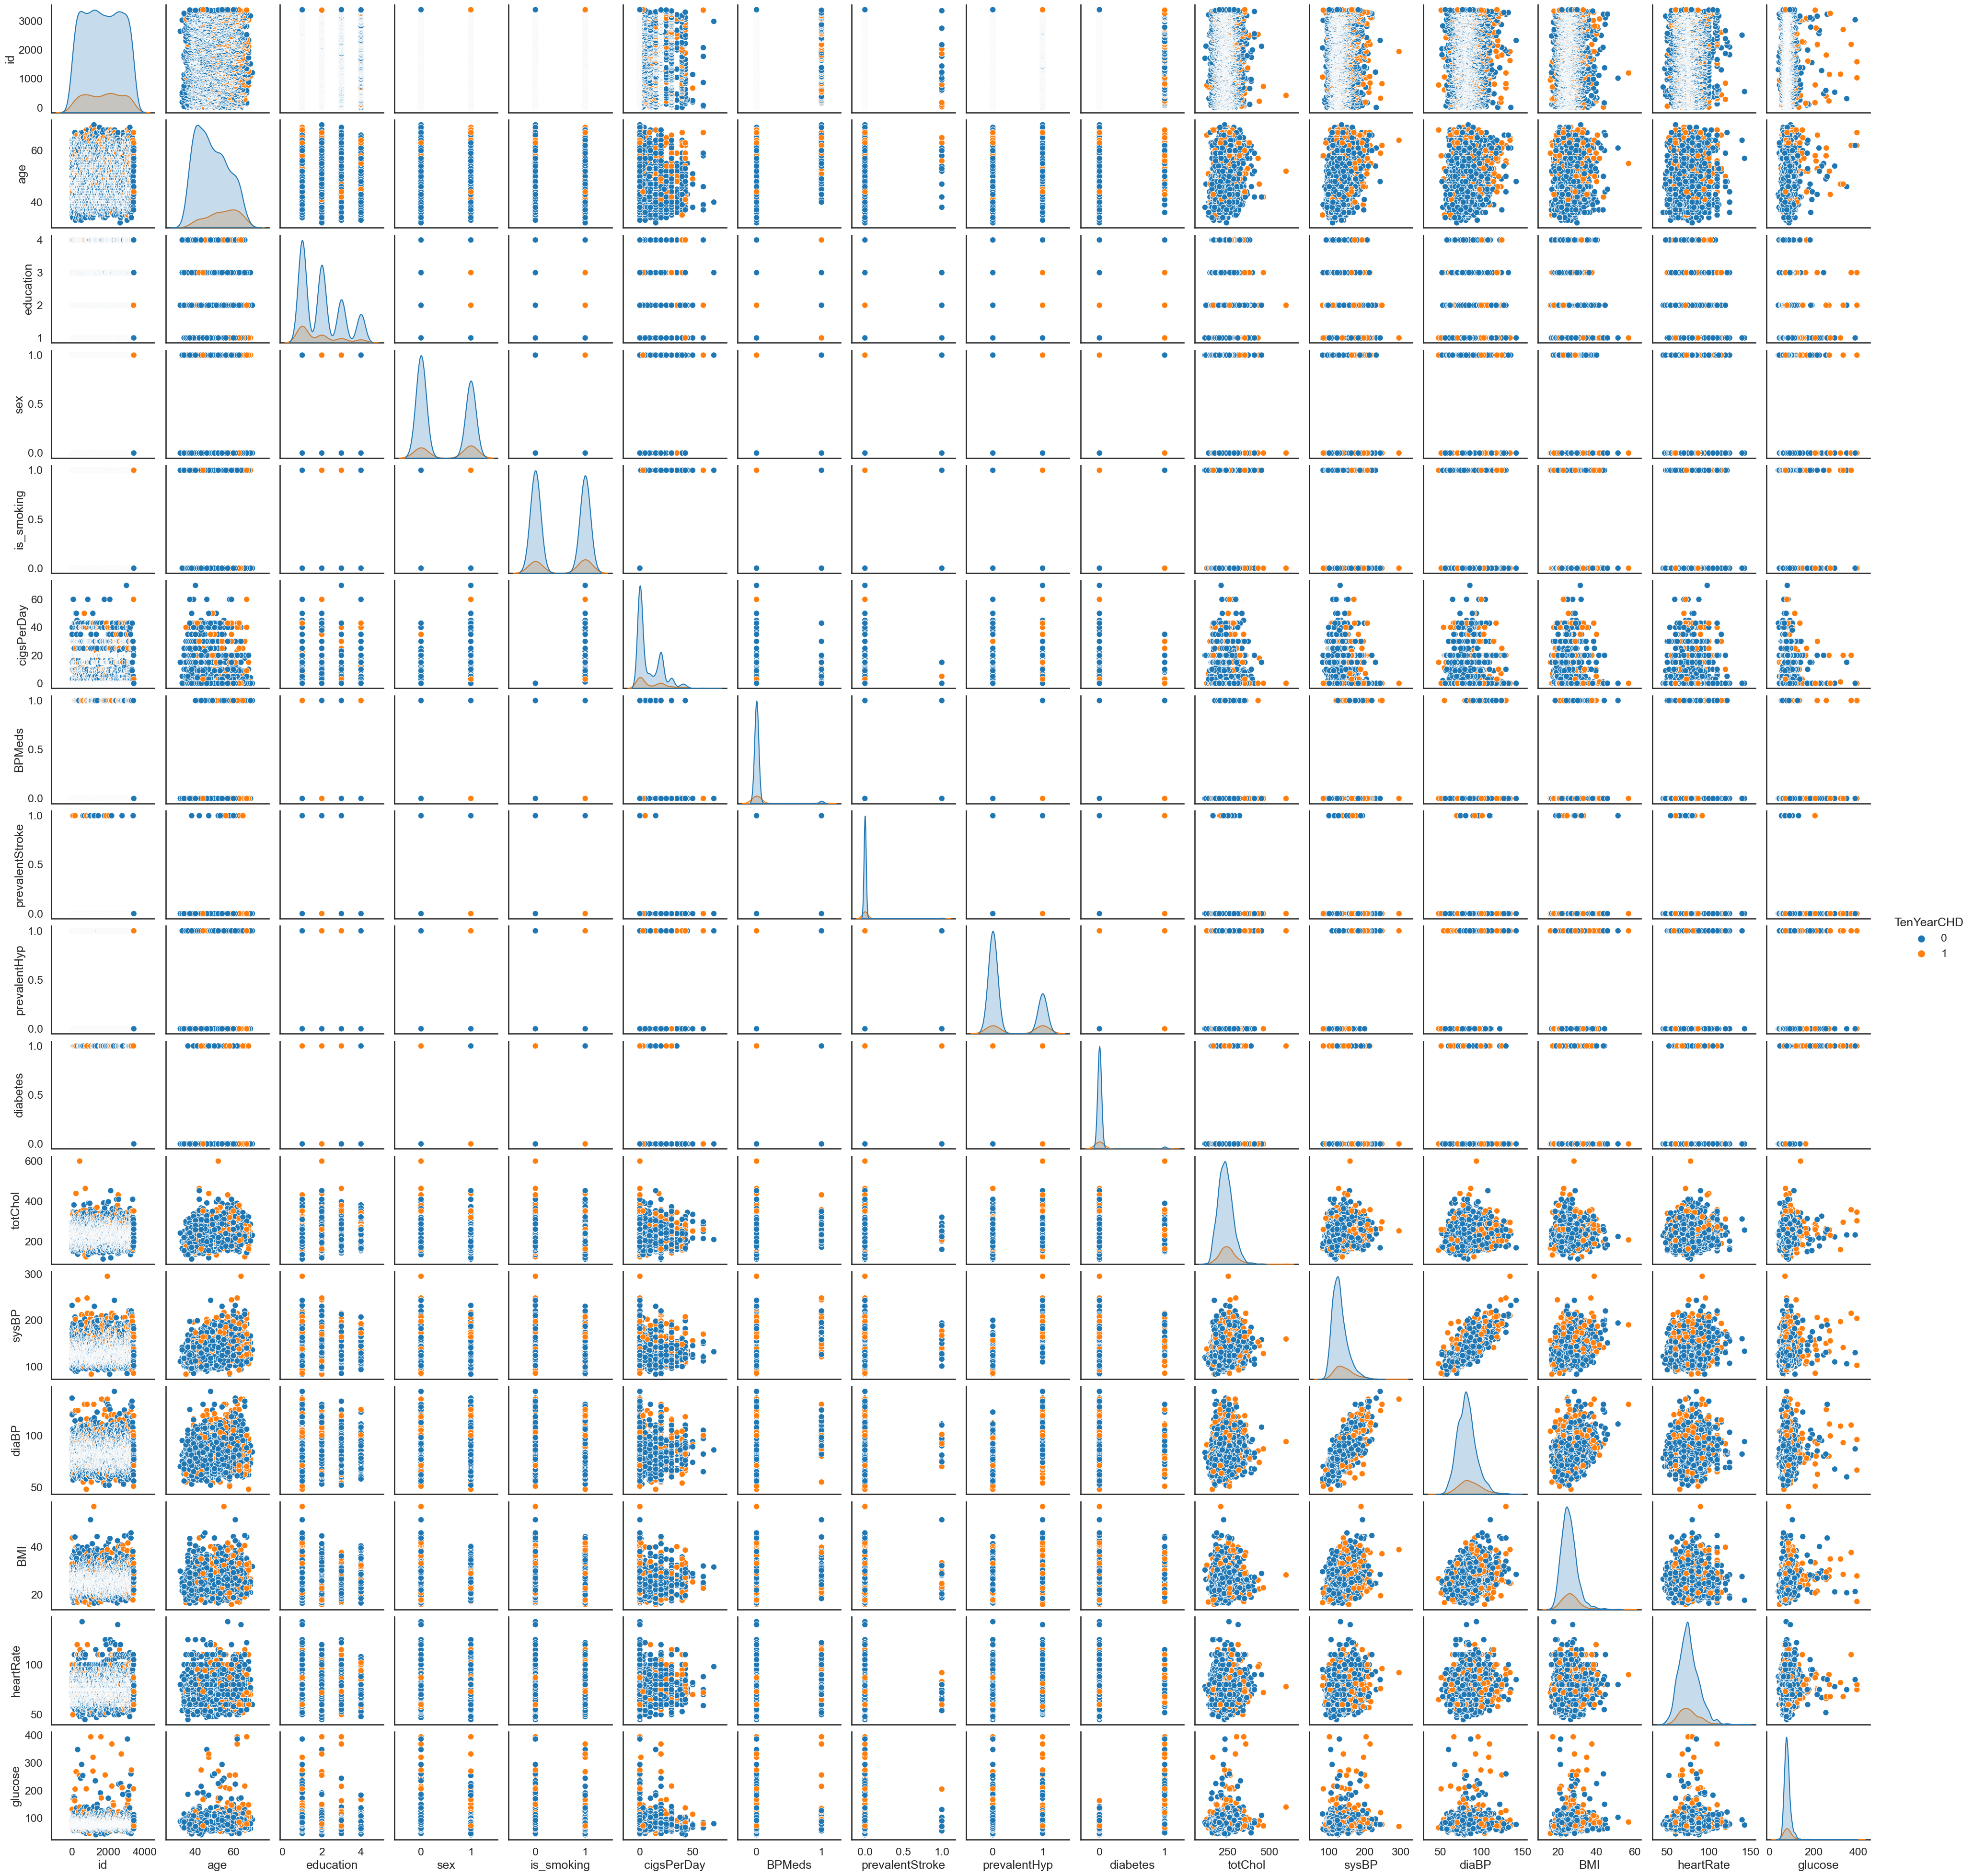

In [585]:
#scatter plot
sns.pairplot(newdf, hue='TenYearCHD')

[(-1.0, 1.0), Text(0, 0.5, 'correlation')]

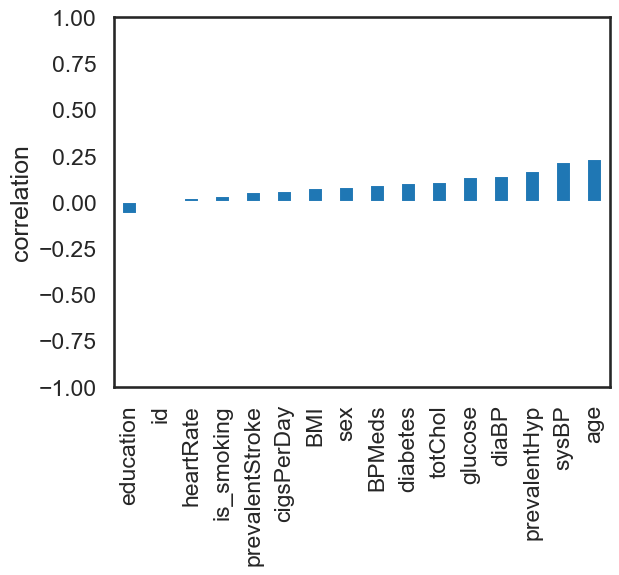

In [270]:
#correlation plot
ax = correlations.plot(kind ='bar')
ax.set(ylim=[-1,1], ylabel ='correlation')

In [312]:
#get top 2 highest correlated features
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = newdf[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['sysBP', 'age'], dtype='object')
Index(['sysBP_scaled', 'age_scaled'], dtype='object')


### Linear Decision Boundary for SVM

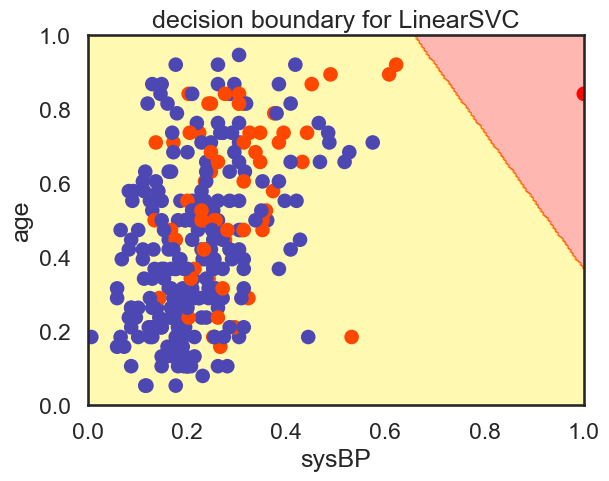

In [313]:
#fit linear SVM classifier to X,y
LSVC = LinearSVC()
LSVC.fit(X, y)

#pick 300 samples from x and get corresponding value of y
X_color = X.sample(300, random_state=45)
y_color = y.reset_index(drop=True).loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'blue')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)

x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
#grid from 0 to 1 by 0.005
xx, yy = np.meshgrid(x_axis, y_axis)
#convert grid to array
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)

ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

### Gaussian Kernel

In [314]:
#fit gaussian kernel SVC to see how decision boundary changes
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.reset_index(drop=True).loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'blue')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

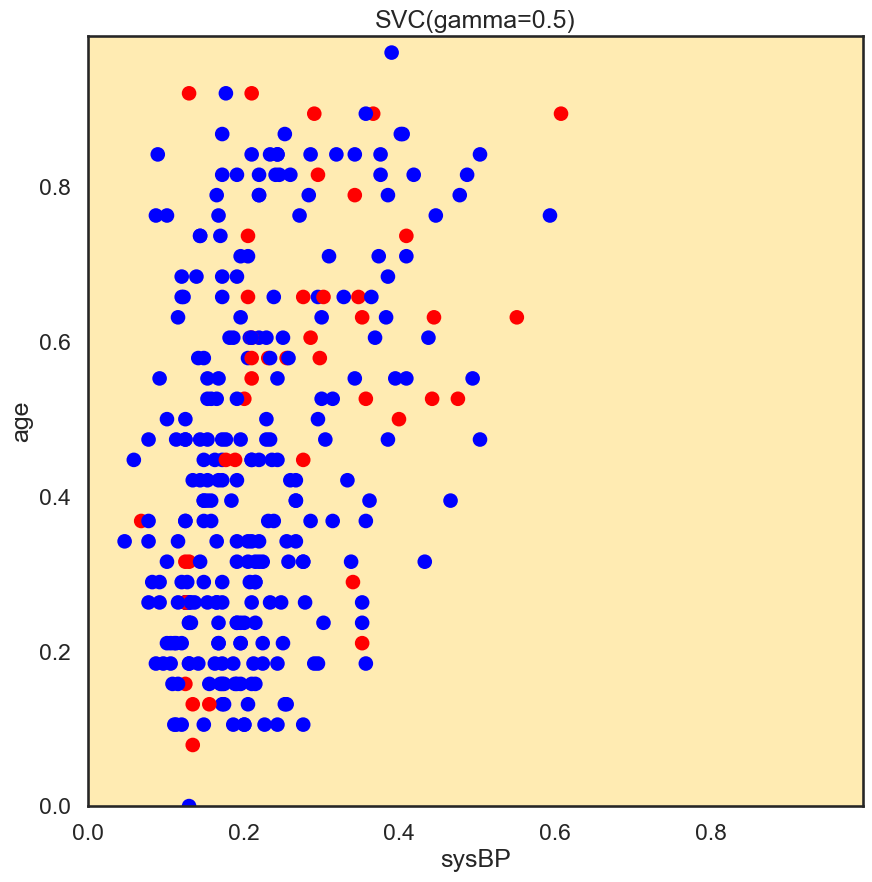

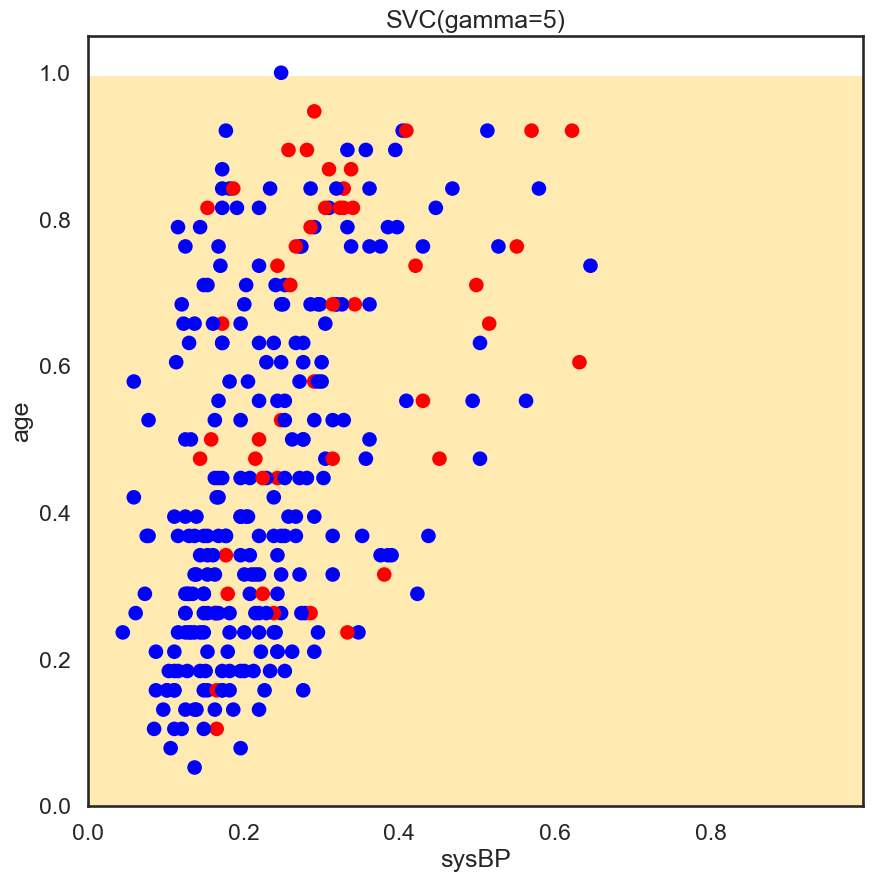

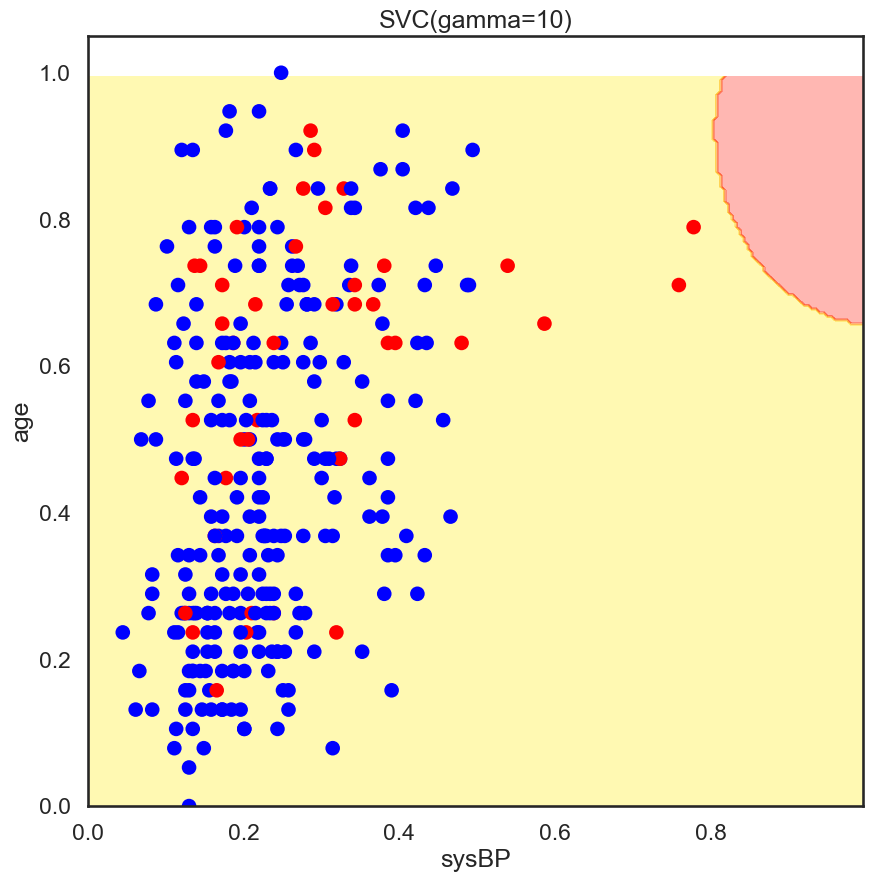

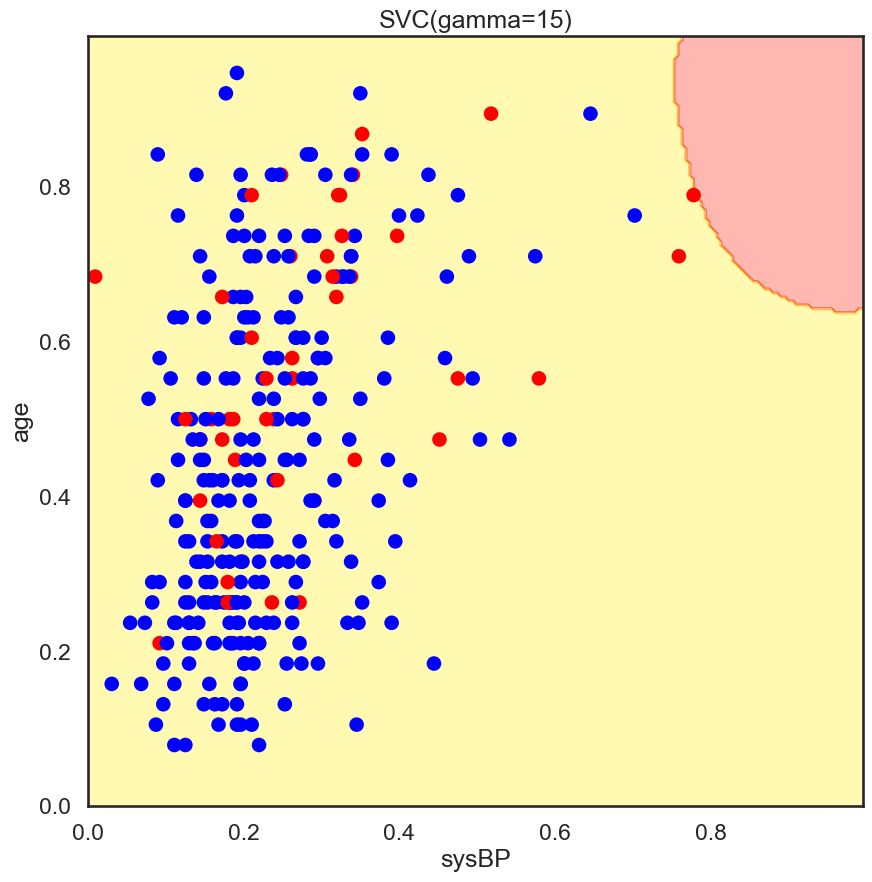

In [146]:
gammas = [0.5, 5, 10, 15]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

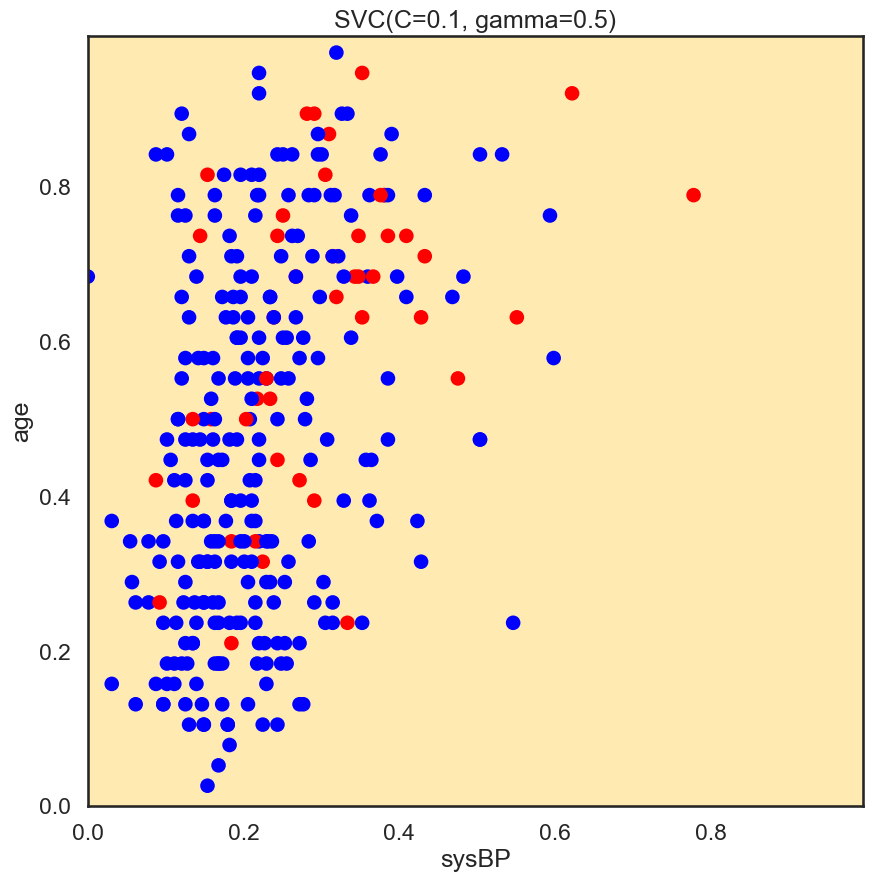

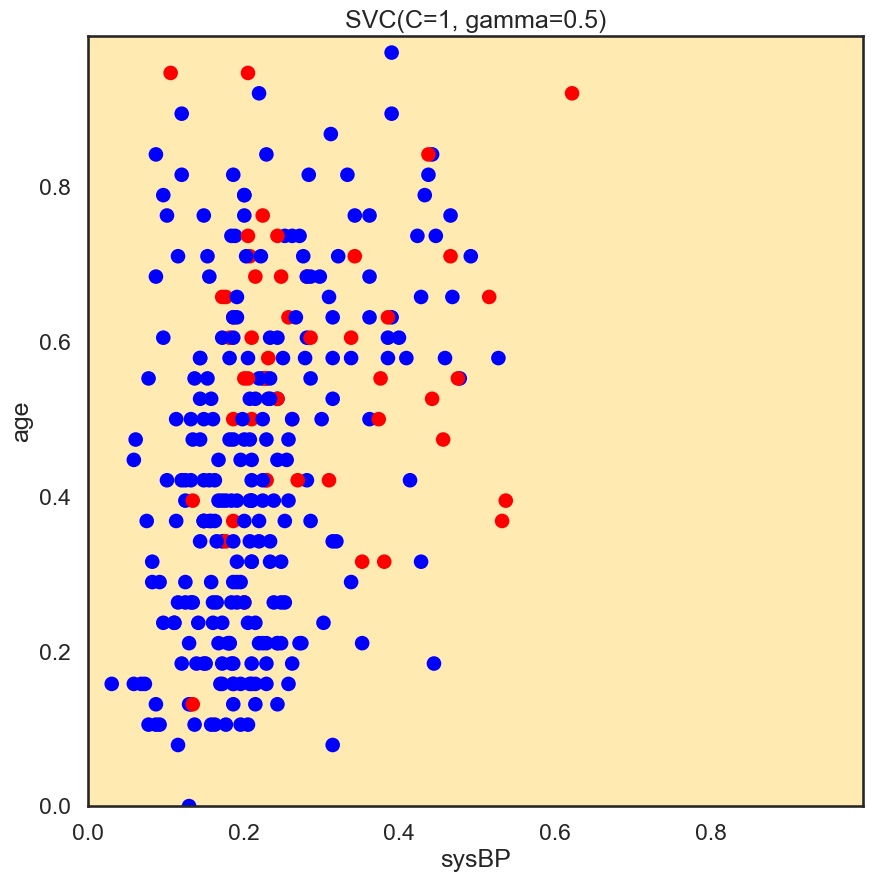

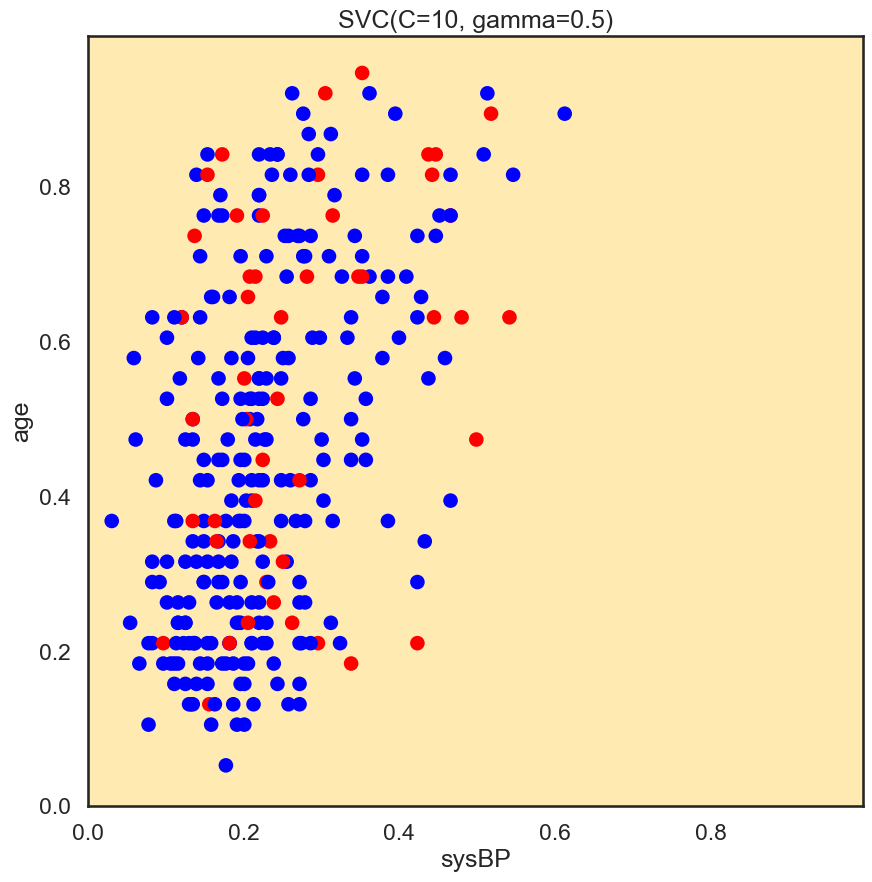

In [147]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=0.5, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

## Error Metrics SVM

In [838]:
X = newdf.drop('TenYearCHD', axis = 1)
y = newdf['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [839]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svc_preds = svm.predict(X_test)

svm_f1 = metrics.f1_score(y_test, svc_preds, average='weighted')
svm_recall = metrics.recall_score(y_test, svc_preds, average='weighted')
svm_acc = metrics.accuracy_score(y_test, svc_preds)

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , svm_f1)
print('Test Accuracy:' , svm_acc)
print('Test Recall:' , svm_recall)

Test F1: 0.7860264104389829
Test Accuracy: 0.8534906588003933
Test Recall: 0.8534906588003933


In [840]:
cm = confusion_matrix(y_test, svc_preds)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[868   0]
 [149   0]]


## SMOTE SVM

In [841]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
y_train_smote.value_counts()

0    2011
1    2011
Name: TenYearCHD, dtype: int64

In [842]:
smote = SVC(random_state=101).fit(X_train_smote,y_train_smote)
svm_preds = smote.predict(X_test)

In [844]:
print('Test Accuracy:' , accuracy_score(y_test, svm_preds))
print('Test F1:' , f1_score(y_test, svm_preds, average='weighted'))
print('Test Recall:' , recall_score(y_test, svm_preds, average='weighted'))

Test Accuracy: 0.6135693215339233
Test F1: 0.6695313570448496
Test Recall: 0.6135693215339233


In [845]:
cm = confusion_matrix(y_test, svm_preds)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[542 326]
 [ 67  82]]


In [846]:
unique_predicted_labels, counts_predicted_labels = np.unique(svm_preds, return_counts=True)
print("Predicted label distribution:")
print(unique_predicted_labels)
print(counts_predicted_labels)

Predicted label distribution:
[0 1]
[609 408]


In [847]:
unique_true_labels, counts_true_labels = np.unique(y_test, return_counts=True)
print("True label distribution:")
print(unique_true_labels)
print(counts_true_labels)

True label distribution:
[0 1]
[868 149]


In [848]:
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73       868
           1       0.20      0.55      0.29       149

    accuracy                           0.61      1017
   macro avg       0.55      0.59      0.51      1017
weighted avg       0.79      0.61      0.67      1017



## SVM Cross Validation GridSearchCV

In [850]:
y = df.TenYearCHD == 'red'
X = df[df.columns[:-1]]

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [851]:
X = newdf.drop('TenYearCHD', axis = 1)
y = newdf['TenYearCHD']

In [852]:
svc = SVC(random_state=101)
accuracies = cross_val_score(svc,X_train,y_train,cv=10)
svc.fit(X_train,y_train)
svc_preds = svc.predict(X_test)
print("Train Score:", np.mean(accuracies))
print("Test Score:", svc.score(X_test,y_test))

Train Score: 0.8474523986809913
Test Score: 0.8534906588003933


In [782]:
grid ={'gamma': [0.5,1,5,10],
            'C': [0.1,1,10]
              }
svm = SVC ()
svm_cv = GridSearchCV(svm, grid, cv = 5, n_jobs=50)
svm_cv.fit(X_train_smote,y_train_smote)

print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))

Best Parameters: {'C': 10, 'gamma': 0.5}
Train Score: 0.6001888075152189
Test Score: 0.8534906588003933


In [853]:
GSCV_svm_preds = svm_cv.best_estimator_.predict(X_test)

print('Test Accuracy:' , accuracy_score(y_test, GSCV_svm_preds))
print('Test F1:' , f1_score(y_test, GSCV_svm_preds, average='weighted'))
print('Test Recall:' , recall_score(y_test, GSCV_svm_preds, average='weighted'))

Test Accuracy: 0.8534906588003933
Test F1: 0.7860264104389829
Test Recall: 0.8534906588003933


# Logistic Regression

In [855]:
df.dtypes.value_counts()

float64    9
int64      8
dtype: int64

In [786]:
# Calculate the correlation values
feature_cols = df.columns[:-1]
corr_values = df[feature_cols].corr()
corr_values

id       age  education       sex  is_smoking  \
id               1.000000  0.016759  -0.030573  0.001004   -0.001511   
age              0.016759  1.000000  -0.172559 -0.041882   -0.210997   
education       -0.030573 -0.172559   1.000000  0.030202    0.027887   
sex              0.001004 -0.041882   0.030202  1.000000    0.215485   
is_smoking      -0.001511 -0.210997   0.027887  0.215485    1.000000   
cigsPerDay      -0.017249 -0.192335   0.011126  0.332208    0.772261   
BPMeds           0.007080  0.124376  -0.019920 -0.044306   -0.037985   
prevalentStroke -0.038873  0.059038  -0.034194 -0.011273   -0.043703   
prevalentHyp     0.013236  0.308826  -0.084817  0.003072   -0.119325   
diabetes         0.003690  0.107875  -0.052013  0.008853   -0.053333   
totChol         -0.019889  0.274028  -0.020781 -0.070914   -0.047065   
sysBP            0.019676  0.404845  -0.137195 -0.037369   -0.145721   
diaBP            0.000832  0.221896  -0.060801  0.058840   -0.124318   
BMI              0.039849  0.138176  -0.133313  0.087204   -0.173067   
heartRate        0.024684 -0.002596  -0.046980 -0.118702    0.062185   
glucose          0.015517  0.116135  -0.038732 -0.007612   -0.061555   

                 cigsPerDay    BPMeds  prevalentStroke  prevalentHyp  \
id                -0.017249  0.007080        -0.038873      0.013236   
age               -0.192335  0.124376         0.059038      0.308826   
education          0.011126 -0.019920        -0.034194     -0.084817   
sex                0.332208 -0.044306        -0.011273      0.003072   
is_smoking         0.772261 -0.037985        -0.043703     -0.119325   
cigsPerDay         1.000000 -0.037080        -0.042057     -0.079312   
BPMeds            -0.037080  1.000000         0.119402      0.259548   
prevalentStroke   -0.042057  0.119402         1.000000      0.071652   
prevalentHyp      -0.079312  0.259548         0.071652      1.000000   
diabetes          -0.049016  0.071316         0.010115      0.082565   
totChol           -0.024703  0.083299        -0.010832      0.159680   
sysBP             -0.100834  0.263729         0.057568      0.699285   
diaBP             -0.068785  0.201217         0.047235      0.612897   
BMI               -0.100996  0.087932         0.018602      0.300464   
heartRate          0.066759  0.018107        -0.019184      0.150815   
glucose           -0.068797  0.064490         0.023607      0.086658   

                 diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
id               0.003690 -0.019889  0.019676  0.000832  0.039849   0.024684   
age              0.107875  0.274028  0.404845  0.221896  0.138176  -0.002596   
education       -0.052013 -0.020781 -0.137195 -0.060801 -0.133313  -0.046980   
sex              0.008853 -0.070914 -0.037369  0.058840  0.087204  -0.118702   
is_smoking      -0.053333 -0.047065 -0.145721 -0.124318 -0.173067   0.062185   
cigsPerDay      -0.049016 -0.024703 -0.100834 -0.068785 -0.100996   0.066759   
BPMeds           0.071316  0.083299  0.263729  0.201217  0.087932   0.018107   
prevalentStroke  0.010115 -0.010832  0.057568  0.047235  0.018602  -0.019184   
prevalentHyp     0.082565  0.159680  0.699285  0.612897  0.300464   0.150815   
diabetes         1.000000  0.059080  0.124011  0.061165  0.089112   0.039742   
totChol          0.059080  1.000000  0.199159  0.154974  0.114305   0.087458   
sysBP            0.124011  0.199159  1.000000  0.781908  0.333864   0.178262   
diaBP            0.061165  0.154974  0.781908  1.000000  0.380498   0.174904   
BMI              0.089112  0.114305  0.333864  0.380498  1.000000   0.069655   
heartRate        0.039742  0.087458  0.178262  0.174904  0.069655   1.000000   
glucose          0.620211  0.062723  0.143090  0.071499  0.093454   0.088334   

                  glucose  
id               0.015517  
age              0.116135  
education       -0.038732  
sex             -0.007612  
is_smoking      -0.061555  
cigsPerDay      -0.068797  
BPMeds          

In [719]:
# Calculate the correlation values
feature_cols = df.columns[:-1]
corr_values = df[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

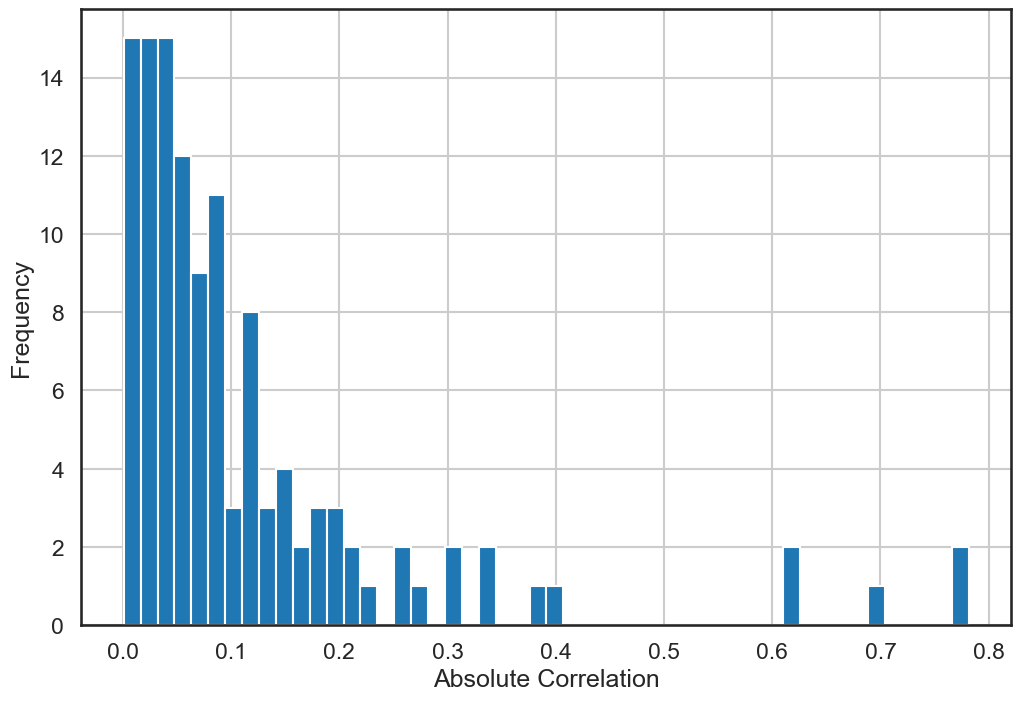

In [720]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [721]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.4')

feature1    feature2  correlation  abs_correlation
110         sysBP       diaBP     0.781908         0.781908
54     is_smoking  cigsPerDay     0.772261         0.772261
94   prevalentHyp       sysBP     0.699285         0.699285
104      diabetes     glucose     0.620211         0.620211
95   prevalentHyp       diaBP     0.612897         0.612897
24            age       sysBP     0.404845         0.404845

## Logisitic Regression Training/Testing

In [856]:
logreg = LogisticRegression(multi_class='multinomial', random_state=42)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

logreg_f1 = metrics.f1_score(y_test, logreg_preds, average='weighted')
logreg_recall = metrics.recall_score(y_test, logreg_preds, average='weighted')
logreg_acc = metrics.accuracy_score(y_test, logreg_preds)

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , logreg_f1)
print('Test Accuracy:' , logreg_acc)
print('Test Recall:' , logreg_recall)

Test F1: 0.802558532692362
Test Accuracy: 0.8584070796460177
Test Recall: 0.8584070796460177


In [857]:
cm = confusion_matrix(y_test, logreg_preds)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[865   3]
 [141   8]]


## SMOTE Logistic Regression

In [858]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
y_train_smote.value_counts()

0    2011
1    2011
Name: TenYearCHD, dtype: int64

In [859]:
logreg_smote = LogisticRegression(multi_class='multinomial', random_state = 42).fit(X_train_smote, y_train_smote)
lr_preds = logreg_smote.predict(X_test)

In [860]:
print('Test Accuracy:' , accuracy_score(y_test, lr_preds))
print('Test F1:' , f1_score(y_test, lr_preds, average='weighted'))
print('Test Recall:' , recall_score(y_test, lr_preds, average='weighted'))

Test Accuracy: 0.6283185840707964
Test F1: 0.6818346685204274
Test Recall: 0.6283185840707964


In [861]:
cm = confusion_matrix(y_test, lr_preds)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[554 314]
 [ 64  85]]


In [862]:
unique_predicted_labels, counts_predicted_labels = np.unique(lr_preds, return_counts=True)
print("Predicted label distribution:")
print(unique_predicted_labels)
print(counts_predicted_labels)

Predicted label distribution:
[0 1]
[618 399]


In [863]:
unique_true_labels, counts_true_labels = np.unique(y_test, return_counts=True)
print("True label distribution:")
print(unique_true_labels)
print(counts_true_labels)

True label distribution:
[0 1]
[868 149]


In [864]:
print(classification_report(y_test, logreg_preds))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       868
           1       0.73      0.05      0.10       149

    accuracy                           0.86      1017
   macro avg       0.79      0.53      0.51      1017
weighted avg       0.84      0.86      0.80      1017



## LR Cross Validation

In [866]:
cv_method = StratifiedShuffleSplit(n_splits=5, test_size = 0.30, random_state=42)

In [867]:
scores_lr = cross_val_score(logreg, X_train_smote, y_train_smote, cv=cv_method, scoring = 'accuracy')

print(f'Scores(Cross Validation) for Logistic Regression model:\n{scores_lr}')
print(f'CrossValMeans: {round(scores_lr.mean(), 3)}')
print(f'CrossValStandard Deviation: {round(scores_lr.std(), 3)}')

Scores(Cross Validation) for Logistic Regression model:
[0.63380282 0.64125932 0.63463132 0.65617233 0.68185584]
CrossValMeans: 0.65
CrossValStandard Deviation: 0.018


## Logisitic Regression SMOTE GridSearchCV

In [868]:
X = newdf.drop('TenYearCHD', axis = 1)
y = newdf['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [869]:
lr = LogisticRegression(multi_class='multinomial', random_state = 42)
accuracies = cross_val_score(lr,X_train,y_train,cv=10)
lr.fit(X_train_smote,y_train_smote)
log = lr.predict(X_test)
print("Train Score:", np.mean(accuracies))
print("Test Score:", lr.score(X_test,y_test))

Train Score: 0.8491366166719854
Test Score: 0.6283185840707964


In [736]:
grid ={'penalty':['l1', 'l2'],
            'C': [0.1,1,10]
              }
estimator_cv = LogisticRegression(multi_class='multinomial', random_state = 42)

LR = GridSearchCV(estimator=estimator_cv, param_grid=grid, cv=cv_method,verbose=1, n_jobs=-1)
LR.fit(X_train,y_train)

print("Best Parameters:",LR.best_params_)
print("Train Score:",LR.best_score_)
print("Test Score:",LR.score(X_test,y_test))
print("Best Estimator", LR.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1, 'penalty': 'l2'}
Train Score: 0.8488764044943821
Test Score: 0.8584070796460177
Best Estimator LogisticRegression(C=1, multi_class='multinomial', random_state=42)


In [870]:
#Predicting Test Set
GSCV_LR_preds = LR.best_estimator_.predict(X_test)

print('Test Accuracy:' , accuracy_score(y_test, GSCV_LR_preds))
print('Test F1:' , f1_score(y_test, GSCV_LR_preds, average='weighted'))
print('Test Recall:' , recall_score(y_test, GSCV_LR_preds, average='weighted'))

Test Accuracy: 0.8584070796460177
Test F1: 0.802558532692362
Test Recall: 0.8584070796460177


In [871]:
cm = confusion_matrix(y_test, GSCV_LR_preds)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[865   3]
 [141   8]]


In [872]:
print(classification_report(y_test, GSCV_LR_preds))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       868
           1       0.73      0.05      0.10       149

    accuracy                           0.86      1017
   macro avg       0.79      0.53      0.51      1017
weighted avg       0.84      0.86      0.80      1017



# Decision Trees

In [875]:
feature_cols = [x for x in df.columns if x not in 'TenYearCHD']

In [877]:
y_train.value_counts(normalize=True).sort_index()

0    0.84745
1    0.15255
Name: TenYearCHD, dtype: float64

In [879]:
y_test.value_counts(normalize=True).sort_index()

0    0.853491
1    0.146509
Name: TenYearCHD, dtype: float64

## Decision Tree Testing/Training

In [902]:
newdf = df.fillna(0)
newdf

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0    0           1         3.0     0.0   
1        1   36        4.0    1           0         0.0     0.0   
2        2   46        1.0    0           1        10.0     0.0   
3        3   50        1.0    1           1        20.0     0.0   
4        4   64        1.0    0           1        30.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
3385  3385   60        1.0    0           0         0.0     0.0   
3386  3386   46        1.0    0           0         0.0     0.0   
3387  3387   44        3.0    1           1         3.0     0.0   
3388  3388   60        1.0    1           0         0.0     0.0   
3389  3389   54        3.0    0           0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0   0.00   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [903]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

dt_f1 = metrics.f1_score(y_test, dt_preds, average='weighted')
dt_acc = metrics.accuracy_score(y_test, dt_preds)
dt_recall = metrics.recall_score(y_test, dt_preds, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , dt_f1)
print('Test Accuracy:' , dt_acc)
print('Test Recall:' , dt_recall)

Test F1: 0.7645530581216824
Test Accuracy: 0.7610619469026548
Test Recall: 0.7610619469026548


In [904]:
cm = confusion_matrix(y_test, dt_preds)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[741 127]
 [116  33]]


In [905]:
dt.tree_.node_count, dt.tree_.max_depth

(683, 20)

In [906]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [907]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy     1.0  0.761062
precision    1.0  0.206250
recall       1.0  0.221477
f1           1.0  0.213592

## SMOTE Decision Tree

In [908]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_smote, y_train_smote)
dt_smote = dt.predict(X_test)

dt_f1 = metrics.f1_score(y_test, dt_smote, average='weighted')
dt_acc = metrics.accuracy_score(y_test, dt_smote)
dt_recall = metrics.recall_score(y_test, dt_smote, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , dt_f1)
print('Test Accuracy:' , dt_acc)
print('Test Recall:' , dt_recall)

Test F1: 0.7428523351789987
Test Accuracy: 0.7197640117994101
Test Recall: 0.7197640117994101


In [909]:
cm = confusion_matrix(y_test, dt_smote)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[685 183]
 [102  47]]


In [910]:
dt.tree_.node_count, dt.tree_.max_depth

(957, 19)

In [911]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [912]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy     1.0  0.719764
precision    1.0  0.204348
recall       1.0  0.315436
f1           1.0  0.248021

## Decision Tree SMOTE GridCV

In [461]:
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train_smote, y_train_smote)

print("Best Parameters:",LR.best_params_)
print("Train Score:",LR.best_score_)
print("Test Score:",LR.score(X_test,y_test))
print("Best Estimator", LR.best_estimator_)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Train Score: 0.8488764044943821
Test Score: 0.8539823008849557
Best Estimator LogisticRegression(C=1, multi_class='multinomial', random_state=42)


In [896]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(971, 17)

In [897]:
GSCV_DT_preds = GR.best_estimator_.predict(X_test)

print('Test Accuracy:' , accuracy_score(y_test, GSCV_DT_preds))
print('Test F1:' , f1_score(y_test, GSCV_DT_preds, average='weighted'))
print('Test Recall:' , recall_score(y_test, GSCV_DT_preds, average='weighted'))


Test Accuracy: 0.7266470009832842
Test F1: 0.7464685053543315
Test Recall: 0.7266470009832842


In [898]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)
train_test_gr_error

train      test
accuracy   0.997472  0.726647
precision  0.989011  0.202765
recall     0.994475  0.295302
f1         0.991736  0.240437

In [899]:
scores_dt = cross_val_score(dt, X_train_smote, y_train_smote, cv = cv_method, n_jobs=-1, scoring="accuracy")

print(f"Scores(Cross validate) for Decision Tree model:\n{scores_dt}")
print(f"CrossValMeans: {round(scores_dt.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_dt.std(), 3)}")

Scores(Cross validate) for Decision Tree model:
[0.8044739  0.78873239 0.77961889 0.81358741 0.8069594 ]
CrossValMeans: 0.799
CrossValStandard Deviation: 0.013


# Random Forest

In [927]:
X = newdf.drop('TenYearCHD', axis = 1)
y = newdf['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

RC = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators = 100)
RC = RC.fit(X_train, y_train)
RC_predict = RC.predict(X_test)

RC_f1 = metrics.f1_score(y_test, RC_predict, average='weighted')
RC_acc = metrics.accuracy_score(y_test, RC_predict)
RC_reRC_predictcall = metrics.recall_score(y_test, RC_predict, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , RC_f1)
print('Test Accuracy:' , RC_acc)
print('Test Recall:' , RC_recall)

Test F1: 0.7969666503622952
Test Accuracy: 0.8515240904621436
Test Recall: 0.823992133726647


In [928]:
cm = confusion_matrix(y_test, RC_predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[859   9]
 [142   7]]


In [929]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [930]:
y_train_pred = RC.predict(X_train)
y_test_pred = RC.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy     1.0  0.851524
precision    1.0  0.437500
recall       1.0  0.046980
f1           1.0  0.084848

## SMOTE Random Forest

In [931]:
RC = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators = 100)
RC = RC.fit(X_train_smote, y_train_smote)
RC_predict = RC.predict(X_test)

RC_f1 = metrics.f1_score(y_test, RC_predict, average='weighted')
RC_acc = metrics.accuracy_score(y_test, RC_predict)
RC_recall = metrics.recall_score(y_test, RC_predict, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' , RC_f1)
print('Test Accuracy:' , RC_acc)
print('Test Recall:' , RC_recall)

Test F1: 0.7940340948697436
Test Accuracy: 0.823992133726647
Test Recall: 0.823992133726647


In [932]:
cm = confusion_matrix(y_test, RC_predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[820  48]
 [131  18]]


In [933]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [934]:
y_train_pred = RC.predict(X_train)
y_test_pred = RC.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy     1.0  0.823992
precision    1.0  0.272727
recall       1.0  0.120805
f1           1.0  0.167442

## Random Forest SMOTE GridCV

In [922]:
param_grid = {'n_estimators': [75, 100, 125],
    'max_features': [.25, .35, 'auto'],
    'max_depth' : [9, 11, 15],
    'criterion' : ['entropy']}

GR_RF = GridSearchCV(estimator= RC, 
                           param_grid=param_grid, 
                           cv=cv_method, 
                           scoring='accuracy', 
                           verbose=1, 
                           n_jobs=-1
                          )

GR_RF = GR_RF.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [923]:
print(GR_RF.best_params_)
print(GR_RF.best_estimator_)
print(GR_RF.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 0.35, 'n_estimators': 125}
RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.35,
                       n_estimators=125, n_jobs=-1, random_state=42)
0.8924606462303231


In [924]:
y_train_pred_gr = GR_RF.predict(X_train)
y_test_pred_gr = GR_RF.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)
train_test_gr_error

train      test
accuracy     1.0  0.822026
precision    1.0  0.271429
recall       1.0  0.127517
f1           1.0  0.173516

In [925]:
scores_rf = cross_val_score(dt, X_train_smote, y_train_smote, cv = cv_method, n_jobs=-1, scoring="accuracy")

print(f"Scores(Cross validate) for Decision Tree model:\n{scores_dt}")
print(f"CrossValMeans: {round(scores_dt.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_dt.std(), 3)}")

Scores(Cross validate) for Decision Tree model:
[0.8044739  0.78873239 0.77961889 0.81358741 0.8069594 ]
CrossValMeans: 0.799
CrossValStandard Deviation: 0.013


In [935]:
GSCV_RF_preds = GR_RF.best_estimator_.predict(X_test)

print('Test Accuracy:' , accuracy_score(y_test, GSCV_RF_preds))
print('Test F1:' , f1_score(y_test, GSCV_RF_preds, average='weighted'))
print('Test Recall:' , recall_score(y_test, GSCV_RF_preds, average='weighted'))

Test Accuracy: 0.8220255653883972
Test F1: 0.7937984264855842
Test Recall: 0.8220255653883972


# Gradient Boost

In [479]:
error_list = list()

tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)

    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    error = 1.0 - accuracy_score(y_test, y_pred)
    
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


error
n_trees          
15.0     0.147493
25.0     0.151426
50.0     0.150442
100.0    0.160275
200.0    0.160275
400.0    0.164208

In [480]:
GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)
GBC = GBC.fit(X_train, y_train)
GBC_predict = GBC.predict(X_test)

GBC_f1 = metrics.f1_score(y_test, GBC_predict, average='weighted')
GBC_acc = metrics.accuracy_score(y_test, GBC_predict)
GBC_recall = metrics.recall_score(y_test, GBC_predict, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' ,GBC_f1)
print('Test Accuracy:' , GBC_acc)
print('Test Recall:' , GBC_recall)

Test F1: 0.8088044658396889
Test Accuracy: 0.8357915437561455
Test Recall: 0.8357915437561455


In [481]:
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_GBC = GV_GBC.fit(X_train, y_train)

In [482]:
print(GV_GBC.best_params_)
print(GV_GBC.best_estimator_)
print(GV_GBC.best_score_)

{'learning_rate': 0.1, 'max_features': 4, 'n_estimators': 50, 'subsample': 0.5}
GradientBoostingClassifier(max_features=4, n_estimators=50, random_state=42,
                           subsample=0.5)
0.8520906062624917


In [483]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[825  43]
 [124  25]]


In [484]:
y_train_pred_gr = GV_GBC.predict(X_train)
y_test_pred_gr = GV_GBC.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)
train_test_gr_error

train      test
accuracy   0.868521  0.852507
precision  0.890625  0.481481
recall     0.157459  0.087248
f1         0.267606  0.147727

## SMOTE Gradient Boost

In [485]:
GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)
GBC = GBC.fit(X_train_smote, y_train_smote)
GBC_smote = GBC.predict(X_test)

GBC_f1 = metrics.f1_score(y_test, GBC_smote, average='weighted')
GBC_acc = metrics.accuracy_score(y_test, GBC_smote)
GBC_recall = metrics.recall_score(y_test, GBC_smote, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' ,GBC_f1)
print('Test Accuracy:' , GBC_acc)
print('Test Recall:' , GBC_recall)

Test F1: 0.7962386363440449
Test Accuracy: 0.8171091445427728
Test Recall: 0.8171091445427728


In [486]:
cm = confusion_matrix(y_test, GBC_smote)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[806  62]
 [124  25]]


In [487]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [488]:
y_train_pred = GBC.predict(X_train)
y_test_pred = GBC.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy   0.930889  0.817109
precision  0.938053  0.287356
recall     0.585635  0.167785
f1         0.721088  0.211864

# SMOTE AdaBoost

In [489]:
ABC = AdaBoostClassifier (base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators = 200)
ABC = ABC.fit(X_train_smote, y_train_smote)
ABC_predict = ABC.predict(X_test)

ABC_f1 = metrics.f1_score(y_test, ABC_predict, average='weighted')
ABC_acc = metrics.accuracy_score(y_test, ABC_predict)
ABC_recall = metrics.recall_score(y_test, ABC_predict, average='weighted')

# Checking Accuracy, F1, and Recall scores
print('Test F1:' ,ABC_f1)
print('Test Accuracy:' ,ABC_acc)
print('Test Recall:' , ABC_recall)

Test F1: 0.7361489073793204
Test Accuracy: 0.7109144542772862
Test Recall: 0.7109144542772862


# Compare Models

In [936]:
acc_results = pd.DataFrame({
                        'Model': ['SVM', 'SMOTE SVM', 'GridSearchCV SMOTE SVM','Logistic Regression', 'SMOTE Logistic Regression',
                                  'GridSearchCV SMOTE Logistic Regression', 'Decision Tree', 'SMOTE Decision Tree', 'GridSearchCV SMOTE Decision Tree',
                                  'Random Forest','SMOTE Random Forest','GridSearchCV SMOTE Random Forest',
                                   'Gradient Boost','SMOTE Gradient Boost', 'SMOTE ADABoost'
                                  
                                 ],
                        'Accuracy Score': [svm_acc, accuracy_score(y_test, svm_preds), accuracy_score(y_test, GSCV_svm_preds),
                                           logreg_acc, accuracy_score(y_test, lr_preds),
                                     accuracy_score(y_test, GSCV_LR_preds), dt_acc, accuracy_score(y_test, dt_preds),accuracy_score(y_test, GSCV_DT_preds),
                                       RC_acc, accuracy_score(y_test, RC_predict), accuracy_score(y_test, GSCV_RF_preds),
                                           GBC_acc, accuracy_score(y_test, GBC_predict), accuracy_score(y_test, ABC_predict)
                                    ]
                        })
acc_result_df = acc_results.sort_values(by="Accuracy Score", ascending=False)
acc_result_df = acc_result_df.set_index("Accuracy Score")
acc_result_df

Model
Accuracy Score                                        
0.858407                           Logistic Regression
0.858407        GridSearchCV SMOTE Logistic Regression
0.853491                                           SVM
0.853491                        GridSearchCV SMOTE SVM
0.835792                          SMOTE Gradient Boost
0.823992                                 Random Forest
0.823992                           SMOTE Random Forest
0.822026              GridSearchCV SMOTE Random Forest
0.817109                                Gradient Boost
0.761062                           SMOTE Decision Tree
0.726647              GridSearchCV SMOTE Decision Tree
0.719764                                 Decision Tree
0.710914                                SMOTE ADABoost
0.628319                     SMOTE Logistic Regression
0.613569                                     SMOTE SVM